In [6]:
# -- coding: utf-8 --
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [7]:
# Dados convertidos para float
fornecedor1 = [22.8, 23.4, 26.2, 24.3, 22.0, 24.8, 26.7, 25.1, 23.1, 22.8,
              25.6, 25.1, 24.3, 24.2, 22.8, 23.2, 24.7, 26.5, 24.5, 23.6,
              23.9, 22.8, 25.4, 26.7, 22.9, 23.5, 23.8, 24.6, 26.3, 22.7]

fornecedor2 = [26.8, 29.3, 28.4, 25.6, 29.4, 27.2, 27.6, 26.8, 25.4, 28.6,
              29.7, 27.2, 27.9, 28.4, 26.0, 26.8, 27.5, 28.5, 27.3, 29.1,
              29.2, 25.7, 28.4, 28.6, 27.9, 27.4, 26.7, 26.8, 25.6, 26.1]

In [8]:
# Teste de igualdade de variâncias
levene_test = stats.levene(fornecedor1, fornecedor2)
equal_var = True if levene_test.pvalue > 0.05 else False

# Teste t independente
t_stat, p_valor = stats.ttest_ind(fornecedor1, fornecedor2, 
                                 equal_var=equal_var)
graus_liberdade = len(fornecedor1) + len(fornecedor2) - 2
t_critico = stats.t.ppf(1-0.05/2, graus_liberdade)  # Teste bicaudal

# Efeito prático (Cohen's d)
pooled_std = np.sqrt(((len(fornecedor1)-1) * np.std(fornecedor1, ddof=1)**2 + 
                    (len(fornecedor2)-1) * np.std(fornecedor2, ddof=1)**2)/
                    (len(fornecedor1) + len(fornecedor2) - 2))
cohen_d = (np.mean(fornecedor1) - np.mean(fornecedor2))/pooled_std



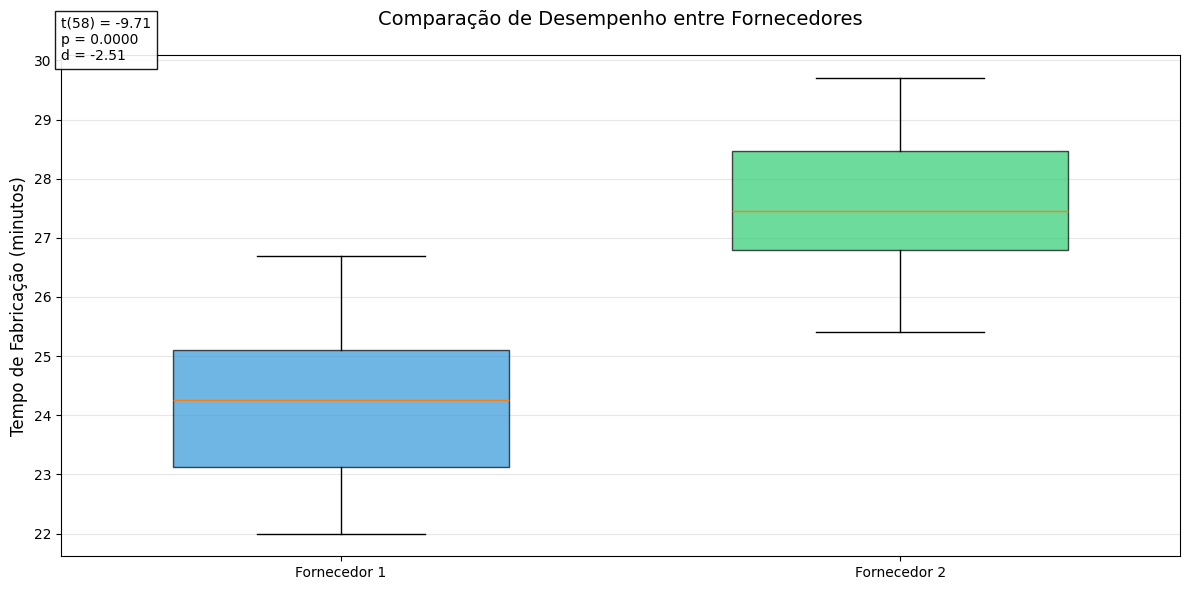

In [9]:
# Configuração do gráfico
plt.figure(figsize=(12, 6))
box = plt.boxplot([fornecedor1, fornecedor2], 
                 labels=['Fornecedor 1', 'Fornecedor 2'],
                 patch_artist=True,
                 widths=0.6)

# Customização visual
colors = ['#3498db', '#2ecc71']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Anotações estatísticas
plt.text(0.5, 30, f't({graus_liberdade}) = {t_stat:.2f}\np = {p_valor:.4f}\nd = {cohen_d:.2f}',
        bbox=dict(facecolor='white', alpha=0.9))

plt.ylabel('Tempo de Fabricação (minutos)', fontsize=12)
plt.title('Comparação de Desempenho entre Fornecedores\n', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



In [10]:
# Resultados numéricos
print(f'''=== Resultados do Teste ===
Média Fornecedor 1: {np.mean(fornecedor1):.2f} ± {np.std(fornecedor1, ddof=1):.2f}
Média Fornecedor 2: {np.mean(fornecedor2):.2f} ± {np.std(fornecedor2, ddof=1):.2f}
Teste de Levene (p): {levene_test.pvalue:.4f}
Estatística t: {t_stat:.3f}
Valor crítico: ±{t_critico:.3f}
Valor-p: {p_valor:.5f}
Cohen's d: {cohen_d:.2f}
Conclusão: {'Rejeitamos H₀' if p_valor < 0.05 else 'Não rejeitamos H₀'}''')

=== Resultados do Teste ===
Média Fornecedor 1: 24.28 ± 1.35
Média Fornecedor 2: 27.53 ± 1.25
Teste de Levene (p): 0.6879
Estatística t: -9.708
Valor crítico: ±2.002
Valor-p: 0.00000
Cohen's d: -2.51
Conclusão: Rejeitamos H₀
